In [1]:
import numpy as np
# install ucimlrepo, pandas, matplotlib packages

from ucimlrepo import fetch_ucirepo 

In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
x = adult.data.features 
y = adult.data.targets 

# shape of data
x.shape, y.shape

((48842, 14), (48842, 1))

In [3]:
# look for null values, data types
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [4]:
# look for null values, data types
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [5]:
import pandas as pd

In [6]:
df = pd.concat([x, y], axis=1)
df.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32411,26,Private,164386,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,48,United-States,<=50K
8295,35,Private,115215,Some-college,10,Never-married,Transport-moving,Own-child,White,Male,0,0,45,United-States,<=50K
36250,23,Private,345577,Some-college,10,Divorced,Priv-house-serv,Not-in-family,White,Female,0,0,26,United-States,<=50K.


In [7]:
df.duplicated().value_counts()

False    48813
True        29
Name: count, dtype: int64

In [8]:
df = df.drop_duplicates(keep='first')
df.shape

(48813, 15)

In [9]:
x = df.drop(columns=['income'])
y = df['income']

<Axes: xlabel='income'>

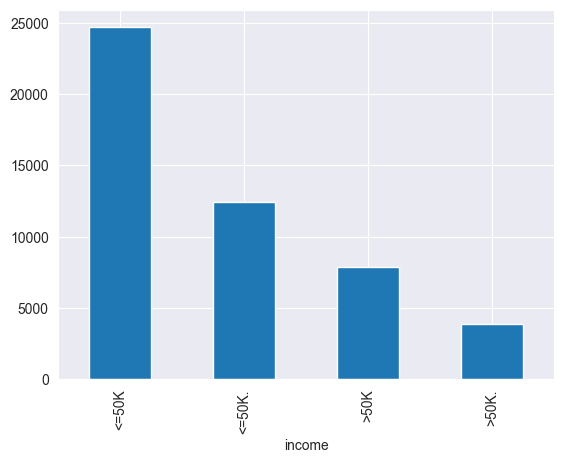

In [10]:
y.value_counts().plot(kind = 'bar')

In [11]:
from imblearn.over_sampling import RandomOverSampler

<Axes: xlabel='income'>

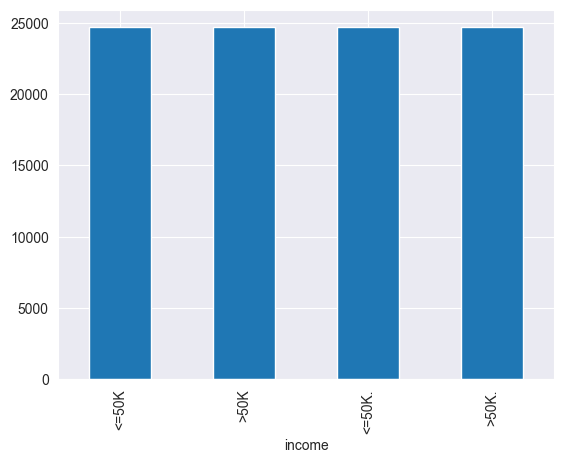

In [12]:
oversample = RandomOverSampler()
x, y = oversample.fit_resample(x, y)
y.value_counts().plot(kind = 'bar')

In [13]:
df = pd.concat([x, y], axis=1)
df.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
49826,41,Private,328013,Masters,14,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,65,United-States,<=50K.
52270,42,Private,314369,HS-grad,9,Divorced,Craft-repair,Unmarried,Black,Male,0,0,45,United-States,<=50K.
41432,46,Private,20534,Masters,14,Married-civ-spouse,Other-service,Husband,White,Male,0,0,20,United-States,<=50K.


In [14]:
# view unique values with value counts
df['income'].value_counts()

income
<=50K     24698
>50K      24698
<=50K.    24698
>50K.     24698
Name: count, dtype: int64

In [15]:
def process_income(income):
    if income == '>50K.':
        return 1
    elif income == '<=50K.':
        return 0
    elif income == '>50K':
        return 1
    elif income == '<=50K':
        return 0
    
df['income'] = df['income'].apply(process_income)
df['income'].value_counts()

income
0    49396
1    49396
Name: count, dtype: int64

In [16]:
import seaborn as sns

<Axes: >

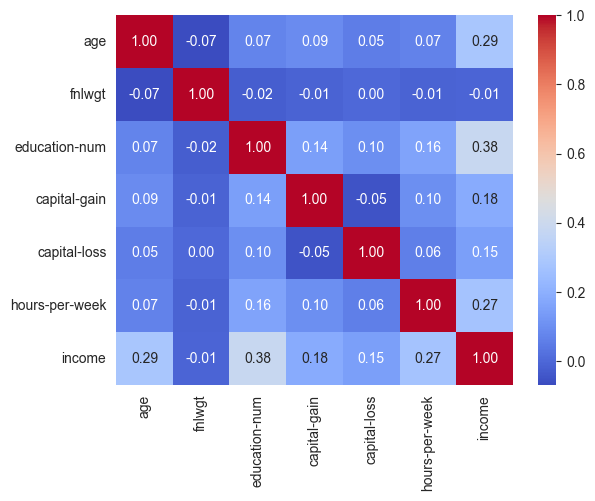

In [17]:
neumerical_features = df.select_dtypes(include=['int64'])
corr_metrics = neumerical_features.corr()
sns.heatmap(corr_metrics, annot=True, fmt='.2f', cmap='coolwarm')

In [18]:
df['age'].describe()

count    98792.000000
mean        40.603875
std         13.017992
min         17.000000
25%         31.000000
50%         40.000000
75%         49.000000
max         90.000000
Name: age, dtype: float64

In [19]:
from matplotlib import pyplot as plt

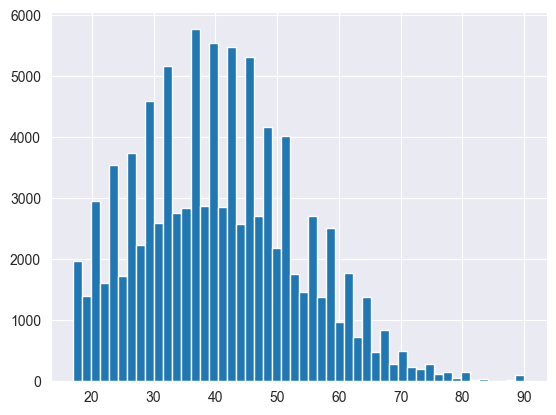

In [20]:
plt.hist(df['age'], bins=50)
plt.show()

In [21]:
(df['age'] > 80).sum()

271

In [22]:
age_filter_1 = df['age'] > 80
df.loc[age_filter_1]['age'].value_counts()

age
90    100
81     77
83     21
84     21
82     19
88     13
85     12
89      4
87      3
86      1
Name: count, dtype: int64

In [23]:
age_filter_2 = df['age'] > 80
age_filter_3 = df['age'] < 90
df.loc[age_filter_2 & age_filter_3, 'age'] = (80 + 90)/ 2
df.loc[age_filter_1]['age'].value_counts()

age
85    171
90    100
Name: count, dtype: int64

In [24]:
df['workclass'].isnull().sum()

2240

In [25]:
df['workclass'] = df['workclass'].fillna('Unknown')

In [26]:
df['workclass'].value_counts()

workclass
Private             66463
Self-emp-not-inc     8324
Local-gov            6771
Self-emp-inc         4945
State-gov            4266
Federal-gov          3506
Unknown              2240
?                    2227
Without-pay            36
Never-worked           14
Name: count, dtype: int64

In [27]:
workclass_filt_1 = df['workclass'] == 'Without-pay'
workclass_filt_2 = df['workclass'] == 'Never-worked'

df.loc[workclass_filt_1 | workclass_filt_2, 'income'].value_counts()

income
0    40
1    10
Name: count, dtype: int64

In [28]:
def process_workclass(workclass):
    if workclass == '?':
        return 'Unknown'
    elif workclass in ['Without-pay', 'Never-worked']:
        return 'Unemployed'
    else:
        return workclass
    
df['workclass'] = df['workclass'].apply(process_workclass)
df['workclass'].value_counts()

workclass
Private             66463
Self-emp-not-inc     8324
Local-gov            6771
Self-emp-inc         4945
Unknown              4467
State-gov            4266
Federal-gov          3506
Unemployed             50
Name: count, dtype: int64

In [29]:
df['education'].value_counts()

education
HS-grad         28214
Some-college    20504
Bachelors       20249
Masters          7893
Assoc-voc        4190
Assoc-acdm       3384
Prof-school      2835
11th             2741
10th             2060
Doctorate        1946
7th-8th          1452
9th              1084
12th             1042
5th-6th           740
1st-4th           346
Preschool         112
Name: count, dtype: int64

In [30]:
filt_preschool = (df['education'] == 'Preschool')
df.loc[filt_preschool, 'income'].value_counts()

income
0    106
1      6
Name: count, dtype: int64

In [32]:
filt_1_4 = df['education'] == '1st-4th'
df.loc[filt_1_4, 'income'].value_counts()

income
0    313
1     33
Name: count, dtype: int64

In [ ]:
def process_education(education):
    if education in ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']:
        return 'Other'
    else:
        return education

df['education'] = df['education'].apply(process_education)

In [33]:
df['education-num'].value_counts()

education-num
9     28214
10    20504
13    20249
14     7893
11     4190
12     3384
15     2835
7      2741
6      2060
16     1946
4      1452
5      1084
8      1042
3       740
2       346
1       112
Name: count, dtype: int64

In [34]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       58636
Never-married            23594
Divorced                 10720
Widowed                   2400
Separated                 2328
Married-spouse-absent     1028
Married-AF-spouse           86
Name: count, dtype: int64

In [35]:
filt_af_spouse = df['marital-status'] == 'Married-AF-spouse'
df.loc[filt_af_spouse, 'income'].value_counts()

income
1    52
0    34
Name: count, dtype: int64

In [36]:
df['occupation'].isnull().sum()

2247

In [37]:
df['occupation'] = df['occupation'].fillna('Unknown')

In [38]:
df['occupation'].value_counts()

occupation
Exec-managerial      16451
Prof-specialty       16344
Craft-repair         12106
Sales                11712
Adm-clerical          9634
Other-service         7136
Machine-op-inspct     5103
Transport-moving      4546
Handlers-cleaners     3144
Tech-support          3080
Farming-fishing       2511
Unknown               2247
?                     2234
Protective-serv       2160
Priv-house-serv        344
Armed-Forces            40
Name: count, dtype: int64

In [39]:
df['occupation'] = df['occupation'].apply(lambda x : 'Unknown' if x == '?' else x)

In [40]:
filt_af = df['occupation'] == 'Armed-Forces'
df.loc[filt_af, 'income'].value_counts()

income
1    30
0    10
Name: count, dtype: int64

In [41]:
df['relationship'].value_counts()

relationship
Husband           51887
Not-in-family     20475
Own-child         10404
Unmarried          7657
Wife               6152
Other-relative     2217
Name: count, dtype: int64

In [42]:
filt_unmarried = df['relationship'] == 'Unmarried'
df.loc[filt_unmarried, 'marital-status'].value_counts()

marital-status
Divorced                 3683
Never-married            1836
Separated                 970
Widowed                   895
Married-spouse-absent     273
Name: count, dtype: int64

In [43]:
df['race'].value_counts()

race
White                 86357
Black                  7764
Asian-Pac-Islander     3162
Amer-Indian-Eskimo      802
Other                   707
Name: count, dtype: int64

In [44]:
df['sex'].value_counts()

sex
Male      72181
Female    26611
Name: count, dtype: int64

In [45]:
df['capital-gain'].describe()

count    98792.000000
mean      2080.028504
std      10618.495201
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [46]:
(df['capital-loss'] == 0).sum()

92374

{'whiskers': [<matplotlib.lines.Line2D at 0x17a942a60>,
 'caps': [<matplotlib.lines.Line2D at 0x17a9425b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a8b1910>],
 'medians': [<matplotlib.lines.Line2D at 0x17a942ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a6ac820>],
 'means': []}

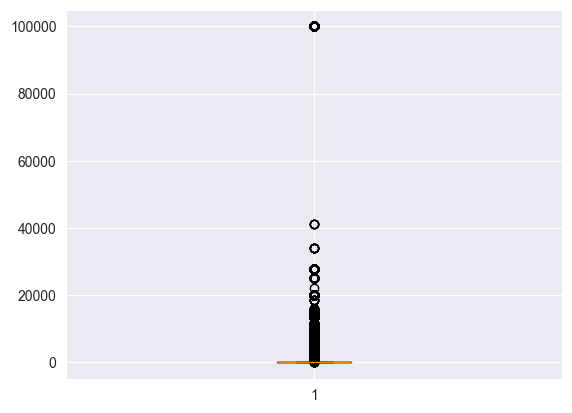

In [47]:
plt.boxplot(df['capital-gain'])

In [48]:
filt_cp_gain_out = df['capital-gain'] > 80000
df['capital-gain'] = np.where(filt_cp_gain_out, np.mean(df[~filt_cp_gain_out]['capital-gain']), df['capital-gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x17a9b7580>,
 'caps': [<matplotlib.lines.Line2D at 0x17a543070>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a9b7550>],
 'medians': [<matplotlib.lines.Line2D at 0x17a514f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a46beb0>],
 'means': []}

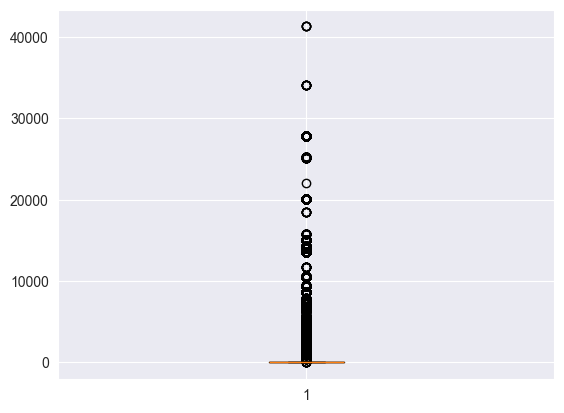

In [49]:
plt.boxplot(df['capital-gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x144813700>,
 'caps': [<matplotlib.lines.Line2D at 0x144813c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x144813460>],
 'medians': [<matplotlib.lines.Line2D at 0x1448231c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x144823460>],
 'means': []}

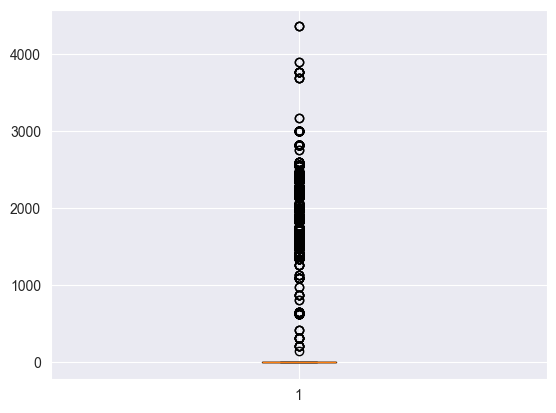

In [50]:
plt.boxplot(df['capital-loss'])

{'whiskers': [<matplotlib.lines.Line2D at 0x144875d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1448862e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x144838b20>],
 'medians': [<matplotlib.lines.Line2D at 0x144886820>],
 'fliers': [<matplotlib.lines.Line2D at 0x144886ac0>],
 'means': []}

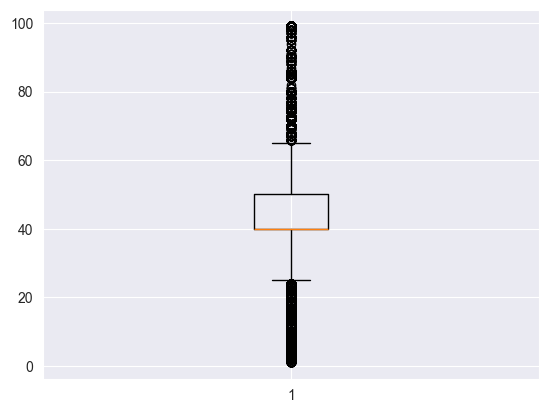

In [51]:
plt.boxplot(df['hours-per-week'])

In [52]:
df['race'].value_counts()

race
White                 86357
Black                  7764
Asian-Pac-Islander     3162
Amer-Indian-Eskimo      802
Other                   707
Name: count, dtype: int64

In [53]:
df['hours-per-week'].describe()

count    98792.000000
mean        42.148605
std         12.253861
min          1.000000
25%         40.000000
50%         40.000000
75%         50.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [60]:
df['native-country'].isnull().sum()

925

In [61]:
df['native-country'] = df['native-country'].fillna('Other')

In [62]:
df['native-country'].value_counts()

native-country
United-States    89254
Other             4258
Mexico            1393
Philippines        635
Canada             419
Germany            415
India              368
Puerto-Rico        319
England            319
China              267
Cuba               266
Italy              232
El-Salvador        232
Japan              214
South              201
Name: count, dtype: int64

In [55]:
df['native-country'] = df['native-country'].apply(lambda x: 'Other' if x == '?' else x)

In [58]:
filt_n_country = df['native-country'].value_counts()
classes_to_replace = filt_n_country[filt_n_country < 100].index
df.loc[df['native-country'].isin(classes_to_replace), 'native-country'] = 'Other'
df['native-country'].value_counts()

native-country
United-States    89254
Other             3333
Mexico            1393
Philippines        635
Canada             419
Germany            415
India              368
Puerto-Rico        319
England            319
China              267
Cuba               266
Italy              232
El-Salvador        232
Japan              214
South              201
Name: count, dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98792 entries, 0 to 98791
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             98792 non-null  int64  
 1   workclass       98792 non-null  object 
 2   fnlwgt          98792 non-null  int64  
 3   education       98792 non-null  object 
 4   education-num   98792 non-null  int64  
 5   marital-status  98792 non-null  object 
 6   occupation      98792 non-null  object 
 7   relationship    98792 non-null  object 
 8   race            98792 non-null  object 
 9   sex             98792 non-null  object 
 10  capital-gain    98792 non-null  float64
 11  capital-loss    98792 non-null  int64  
 12  hours-per-week  98792 non-null  int64  
 13  native-country  97867 non-null  object 
 14  income          98792 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 11.3+ MB


In [63]:
from sklearn.decomposition import PCA

In [64]:
filt_pca = df[['fnlwgt', 'capital-gain', 'capital-loss']]

In [65]:
pca = PCA(n_components= 1)
pca_components = pca.fit_transform(filt_pca)

In [66]:
pca_components

array([[-111386.69216603],
       [-105591.28773451],
       [  26743.70997404],
       ...,
       [-121231.28746369],
       [ 127686.70822616],
       [ -35855.28894203]])

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc = StandardScaler()
pca_components = sc.fit_transform(pca_components)

In [69]:
df = df.drop(columns=['fnlwgt', 'capital-gain', 'capital-loss'])
x = df.drop(columns=['income'])
x['pca'] = pca_components
y = df['income']

In [70]:
x = pd.get_dummies(x)

In [71]:
x.head()

,age,education-num,hours-per-week,pca,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Germany,native-country_India,native-country_Italy,native-country_Japan,native-country_Mexico,native-country_Other,native-country_Philippines,native-country_Puerto-Rico,native-country_South,native-country_United-States
0,39,13,40,-1.065080,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,50,13,13,-1.009664,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,38,9,40,0.255723,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,53,7,40,0.438119,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,28,13,40,1.429583,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
x_train.shape, x_test.shape

((59275, 78), (39517, 78))

In [74]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [75]:
bernouli_model = BernoulliNB()
bernouli_model.fit(x_train,y_train)
pred = bernouli_model.predict(x_test)
accuracy_score(y_test,pred)

0.7695675278993851

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'force_alpha': [True, False],
    'binarize': [0.0, 0.5, 1.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5], [0.6, 0.4], [0.4, 0.6]]
}

In [78]:
grid_search_bernouli = GridSearchCV(estimator = bernouli_model, param_grid = param_grid)
grid_search_bernouli.fit(x_train,y_train)

GridSearchCV(estimator=BernoulliNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
                         'binarize': [0.0, 0.5, 1.0],
                         'class_prior': [None, [0.5, 0.5], [0.6, 0.4],
                                         [0.4, 0.6]],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]})

In [79]:
grid_search_bernouli.best_params_

{'alpha': 0.1,
 'binarize': 0.0,
 'class_prior': [0.4, 0.6],
 'fit_prior': True,
 'force_alpha': True}

In [80]:
grid_search_bernouli.score(x_test,y_test)

0.770200167016727

In [81]:
y_pred = grid_search_bernouli.predict(x_test)

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
confusion_matrix(y_test, y_pred)

array([[13980,  5831],
       [ 3250, 16456]])

In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.75     19811
           1       0.74      0.84      0.78     19706

    accuracy                           0.77     39517
   macro avg       0.77      0.77      0.77     39517
weighted avg       0.77      0.77      0.77     39517


In [86]:
from sklearn.metrics import roc_auc_score

In [87]:
print(roc_auc_score(y_test, y_pred))

0.7703720897280888


In [88]:
from sklearn.metrics import roc_curve

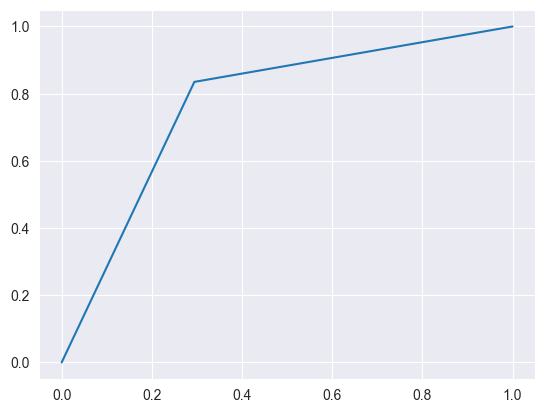

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)

In [90]:
from sklearn.ensemble import RandomForestClassifier

Text(0, 0.5, 'Accuracy')

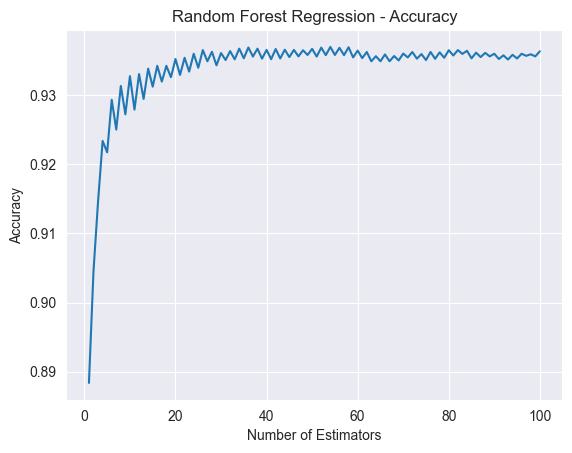

In [91]:
test_acc_list = []

for i in range(1, 101):
    rf_model = RandomForestClassifier(n_estimators=i, random_state=42)
    rf_model.fit(x_train, y_train)
    
    # testing set
    test_pred = rf_model.predict(x_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_list.append(test_acc)

plt.plot(range(1, 101), test_acc_list)
plt.title('Random Forest Regression - Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')

In [92]:
rf_model = RandomForestClassifier(n_estimators=40, random_state=42)
rf_model.fit(x_train, y_train)
test_pred = rf_model.predict(x_test)
accuracy_score(y_test, test_pred)

0.9365083381835666

In [93]:
param_grid = {
    'n_estimators': [40],
    'random_state': [42],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'warm_start': [True, False]
}

In [94]:
grid_search_rf = GridSearchCV(estimator = rf_model,param_grid = param_grid)
grid_search_rf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=40, random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'], 'n_estimators': [40],
                         'random_state': [42], 'warm_start': [True, False]})

In [95]:
grid_search_rf.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'n_estimators': 40,
 'random_state': 42,
 'warm_start': True}

In [96]:
grid_search_rf.score(x_test,y_test)

0.9404307007110864

In [97]:
y_pred = grid_search_rf.predict(x_test)

In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
confusion_matrix(y_test, y_pred)

array([[18066,  1745],
       [  609, 19097]])

In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     19811
           1       0.92      0.97      0.94     19706

    accuracy                           0.94     39517
   macro avg       0.94      0.94      0.94     39517
weighted avg       0.94      0.94      0.94     39517


In [102]:
from sklearn.metrics import roc_auc_score

In [103]:
print(roc_auc_score(y_test, y_pred))

0.9405066642073491


In [104]:
from sklearn.metrics import roc_curve

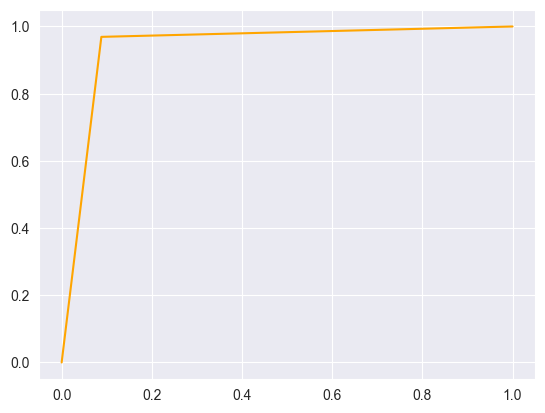

In [105]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')